In [28]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import math

In [29]:
data_b_PM10=pd.read_excel("/Users/roshanchandraayyadevara/Documents/Dataset_Dessertation/year/PM10_Data.xlsx",sheet_name='Birmingham_1')
data_l_PM10=pd.read_excel("/Users/roshanchandraayyadevara/Documents/Dataset_Dessertation/year/PM10_Data.xlsx",sheet_name='London')
data_lp_PM10=pd.read_excel("/Users/roshanchandraayyadevara/Documents/Dataset_Dessertation/year/PM10_Data.xlsx",sheet_name='Liverpool')

In [30]:
df_b_PM10=data_b_PM10[["Year","Site_Name","City","Annual_Mean"]]
df_l_PM10=data_l_PM10[["Year","Site_Name","City","Annual_Mean"]]
df_lp_PM10=data_lp_PM10[["Year","Site_Name","City","Annual_Mean"]]

In [31]:
df_b_PM10=data_b_PM10.groupby('Year').agg(PM10_Birmingham=('Annual_Mean', 'mean')).reset_index()
df_l_PM10=data_l_PM10.groupby('Year').agg(PM10_London=('Annual_Mean', 'mean')).reset_index()
df_lp_PM10=data_lp_PM10.groupby('Year').agg(PM10_Liverpool=('Annual_Mean', 'mean')).reset_index()

In [32]:
B_PM10=df_b_PM10['PM10_Birmingham']
l_PM10=df_l_PM10['PM10_London']
lp_PM10=df_lp_PM10['PM10_Liverpool']

In [42]:
df_b_PM10

,Year,PM10_Birmingham
0,2000,21.500000
1,2001,22.000000
2,2002,21.500000
3,2003,25.000000
4,2004,22.000000
5,2005,23.500000
6,2006,25.500000
7,2007,22.000000
8,2008,17.500000
9,2009,19.333333


In [34]:
print("Maximum of Birmingham",max(B_PM10))
print("Maximum of London",max(l_PM10))
print("Maximum of Liverpool",max(lp_PM10))

Maximum of Birmingham 25.5
Maximum of London 31.375
Maximum of Liverpool 26.0


In [35]:
print("Minimum of Birmingham",min(B_PM10))
print("Minimum of London",min(l_PM10))
print("Minimum of Liverpool",min(lp_PM10))

Minimum of Birmingham 13.0
Minimum of London 14.222222222222221
Minimum of Liverpool 11.0


In [36]:
print("SD of Birmingham",B_PM10.std())
print("SD of London",l_PM10.std())
print("SD of Liverpool",lp_PM10.std())

SD of Birmingham 3.7678574959509263
SD of London 5.108866207436514
SD of Liverpool 4.5099801494703495


In [37]:
print("Variance of Birmingham",B_PM10.var())
print("Variance of London",l_PM10.var())
print("Variance of Liverpool",lp_PM10.var())

Variance of Birmingham 14.196750109793586
Variance of London 26.100513925486755
Variance of Liverpool 20.339920948616598


In [38]:
print("Mean of Birmingham",B_PM10.mean())
print("Mean of London",l_PM10.mean())
print("Mean of Liverpool",lp_PM10.mean())

Mean of Birmingham 19.152173913043477
Mean of London 22.74673913043478
Mean of Liverpool 17.391304347826086


In [39]:
import pandas as pd
import scipy.stats as stats
import statsmodels.stats.multicomp as mc

# Assuming B_PM102, l_PM102, and lp_PM102 are pandas Series containing the data for Birmingham, London, and Liverpool respectively.

# Combine the data into a single DataFrame
data = pd.DataFrame({
    'Birmingham': B_PM10,
    'London': l_PM10,
    'Liverpool': lp_PM10
})

# Perform one-way APM10VA
f_statistic, p_value = stats.f_oneway(data['Birmingham'], data['London'], data['Liverpool'])

# Print the results
print("F-statistic:", f_statistic)
print("p-value:", p_value)

# Check for statistical significance (alpha = 0.05)
if p_value < 0.05:
    print("The means are significantly different among the cities.")
    # Perform Tukey's HSD test for post hoc analysis
    mc_result = mc.MultiComparison(data.melt(var_name='City', value_name='PM10 Concentration')['PM10 Concentration'],
                                   data.melt(var_name='City', value_name='PM10 Concentration')['City'])
    tukey_result = mc_result.tukeyhsd()
    print(tukey_result)
else:
    print("There is PM10 significant difference among the cities.")


F-statistic: 8.477896659945513
p-value: 0.0005284550870430431
The means are significantly different among the cities.
   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1     group2  meandiff p-adj   lower  upper  reject
----------------------------------------------------------
Birmingham Liverpool  -1.7609 0.3848 -4.9396 1.4179  False
Birmingham    London   3.5946 0.0229  0.4158 6.7733   True
 Liverpool    London   5.3554 0.0004  2.1767 8.5342   True
----------------------------------------------------------


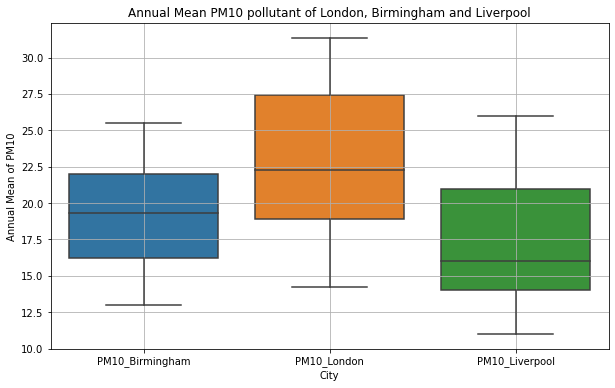

In [40]:
# Combine the data frames
merged_df = df_b_PM10.merge(df_l_PM10, on='Year').merge(df_lp_PM10, on='Year')

# Create a new data frame for Seaborn (melt the data to make it long-form)
melted_df = pd.melt(merged_df, id_vars='Year', var_name='City', value_name='PM10_Concentration')

# Plot box plots using Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='City', y='PM10_Concentration', data=melted_df)
plt.title('Annual Mean PM10 pollutant of London, Birmingham and Liverpool')
plt.ylabel('Annual Mean of PM10')
plt.xlabel('City')
plt.grid(True)
plt.show()


In [41]:
import pandas as pd
import scipy.stats as stats
import statsmodels.stats.multicomp as mc

# Assuming B_NO2, l_NO2, and lp_NO2 are pandas Series containing the data for Birmingham, London, and Liverpool respectively.

# Combine the data into a single DataFrame
data = pd.DataFrame({
    'Birmingham': B_PM10,
    'London': l_PM10,
    'Liverpool': lp_PM10
})

# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(data['Birmingham'], data['London'], data['Liverpool'])

# Print the results
print("F-statistic:", f_statistic)
print("p-value:", p_value)

# Check for statistical significance (alpha = 0.05)
if p_value < 0.05:
    print("The means are significantly different among the cities.")
    # Perform Tukey's HSD test for post hoc analysis
    mc_result = mc.MultiComparison(data.melt(var_name='City', value_name='NO Concentration')['NO Concentration'],
                                   data.melt(var_name='City', value_name='NO Concentration')['City'])
    tukey_result = mc_result.tukeyhsd()
    print(tukey_result)

    # Get the increasing order of cities based on their NO2 concentrations
    mean_values = data.mean().sort_values(ascending=False)  # Sort in ascending order
    increasing_order = mean_values.index.tolist()
    print("Increasing order of cities based on PM 10 concentrations:")
    print(increasing_order)

else:
    print("There is no significant difference among the cities.")


F-statistic: 8.477896659945513
p-value: 0.0005284550870430431
The means are significantly different among the cities.
   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1     group2  meandiff p-adj   lower  upper  reject
----------------------------------------------------------
Birmingham Liverpool  -1.7609 0.3848 -4.9396 1.4179  False
Birmingham    London   3.5946 0.0229  0.4158 6.7733   True
 Liverpool    London   5.3554 0.0004  2.1767 8.5342   True
----------------------------------------------------------
Increasing order of cities based on PM 10 concentrations:
['London', 'Birmingham', 'Liverpool']
